# Homework 2

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
from numpy import *

%precision %.2f
miles = 5280 # Miles -> Feet
meters = (100/2.54)/12 # Meters -> Feet
km = 1000 * meters / miles

In [2]:
def f(x: int) -> float:
    return 200 * log(7.06e-4 * (x + 1416))

def dfdx(x: int) -> float:
    return 200 / (x + 1416)

def beta(x: int) -> float:
    return arctan(dfdx(x))

In [3]:
x = linspace(0,3 * miles,100)
road = f(x)

a) Plot the road profile in the x-y plane for $0 \leq x \leq 15,840$ ft.

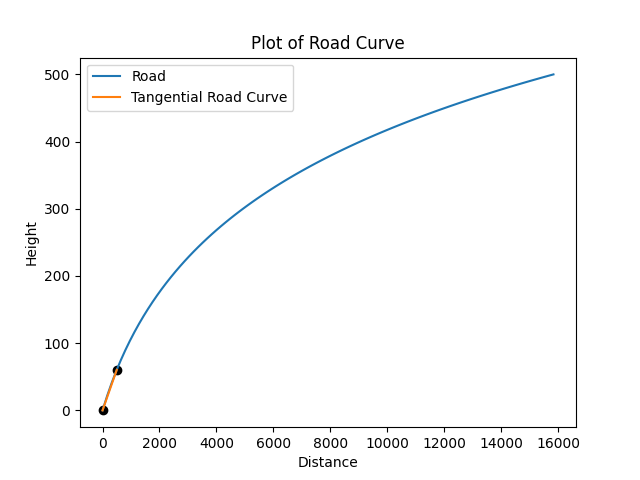

In [4]:
plt.figure()
plt.plot(x,road)
plt.plot([x[0],(500)], [f(0), f(500)])
plt.scatter(x[0],f(0), color='black')
plt.scatter(500, f(500), color='black')
plt.xlabel('Distance')
plt.ylabel('Height')
plt.title('Plot of Road Curve')
plt.legend(['Road','Tangential Road Curve'])
plt.show()

b) Derive an expression for $\beta (x)$. Calculate $\beta(500 \text{ft})$

$\beta$ is defined as "the angle of the slope of x of the road", according to the slides. Since the function given varies in slope, we calculate the derivative of the of the road.
$$
\beta (x) = \text{atan}(m)
$$

where,
$$
m = \frac{dy_\text{road}}{dx}
$$

$$
\begin{align}
\beta(x) &= \text{atan}(\frac{dy_{\text{road}}}{dx}) \\
         &= \text{atan}(200\ \frac{d}{dx} \text{ln}(7.06 \times 10^{-4} (x + 1416)) \\
         &= \text{atan}(\frac{200}{x + 1416})
\end{align}
$$
Therefore, if we solve for $x = 500 \text{ft}$,
$$
\begin{align}
\beta(500) &= \text{arctan}(\frac{200}{500+1416}) \\
                       &= 0.104\ \text{radians} \\
                       &= 5.959 \degree
\end{align}
$$


c) Derive expression for $\text{percent grade}(x)$ Calculate $\text{percent grade}(500\ \text{ft})$

In [5]:
def percent_grade(x: int) -> float:
    return 100*dfdx(x)

print(f"{percent_grade(500):0.2f} %")

10.44 %


d) Derive an expression for tangential road length $s(x)$, such that $s(0)=0$. Calculate $s(500\ \text{ft})$

In [6]:
def s(x: int) -> float:
    return sqrt(f(x)**2 + x**2)

print(f"{s(500):0.0f} ft")


504 ft


## Problem 2
An electric vehicle has the following parameter values:

In [7]:
m = 692.0 #kg
CD = 0.2
AF = 2.0 # m^2
C0 = 0.009
C1 = 1.75e-6 # s^2/m^2
rho = 1.16 # kg/m^3
g = 9.81 # m/s^2
grade = 0.15

The EV is stopped at a stop sign at a point in the road where the grade is +15%. The tractive force of the vehicle is supplied by the vehicle brakes.
  1. Calculate the tractive force necessary for zero rolling resistance (The vehicle is at rest).


$$
\begin{align}
\beta &= tan(\text{grade}) \\
      &= tan(0.15) \\
      &= 8.659 \degree


\end{align}
$$


$$
\begin{align}
F_{TR} &= F_{AD} + F_{ROLL} + F_{gxT} \\
       &= mg[sin(\beta) + C_0 sgn(V)] + sgn(V)*[mgC_1 + \frac{\rho}{2}C_D A_F] V^2

\end{align}
$$




In [8]:
def F_tr(mass: float, grade: float, C0: float, V, C1:float, rho:float, CD: float, AF: float) -> float:
    beta = tan(grade)
    return mass * g * (sin(beta) + C0 * sign(V)) + sign(V) * (mass * g * C1 + (rho/2) * CD * AF) * V**2

print(f"{F_tr(m, grade, C0, 0, C1, rho, CD, AF ):0.2f} N")

1022.08 N


  2. Calculate the minimum tractive force required from the brakes to keep the EV from rolling down the grade.

In [9]:
# TODO

The EV in problem 2 is moving at a constant velocity along a road that has a constant grade of -12%.
  1. Plot, on the same graph, the magnitudes of the tangential gravitational force ($F_{gT}$), the aerodynamic drag force ($F_{AD}$), and the rolling resistance force ($F_{ROLL}$) versus velocity for $0 \lt V \le 180 \text{mph}$.
      1. Over that range of velocity, does $F_\text{gT}$ dominate?
      2. When does $F_\text{AD}$ dominate?
      3. When does $F_\text{ROLL}$ dominate?

     Label these regions on the graph.

  2. Derive an expression for the tractive force as a function of velocity. Plot this
expression on its own graph. Is the tractive force always in the same direction?

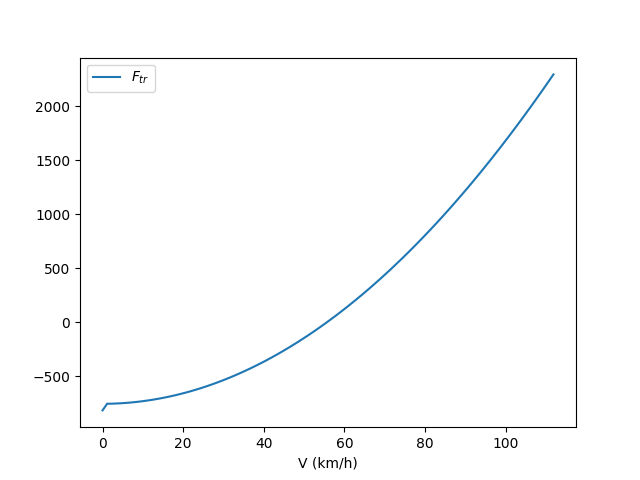

In [10]:
grade = -0.12
V = linspace(0,180,100) * km
plt.figure()
y = F_tr(m, grade, C0, V, C1, rho, CD, AF )
plt.plot(V,y)
plt.xlabel('V (km/h)')
plt.legend(['$F_{tr}$'])
plt.show()